## Deep Learning Applied to Images - Convolutional Neural Networks

#### Prof. Thomas da Silva Paula

### Using a pre-trained Convolutional neural network for image classification

* Using Keras
* Using Inception-v3, trained on ImageNet data

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

plt.rcParams['figure.figsize'] = [15, 5]

## Loading the model

In [2]:
inception = keras.applications.InceptionV3(include_top=True, weights='imagenet')
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
inception.input

<tf.Tensor 'input_1:0' shape=(None, 299, 299, 3) dtype=float32>

## Using the model to classify new images

### Helper methods

In [4]:
def plot_predictions(decoded_preds):
    classes = [c[1] for c in decoded_preds[0]]
    scores = [c[2] for c in decoded_preds[0]]  
    
    plt.bar(np.arange(0, len(scores)), scores, tick_label=classes)

### Preprocessing
As before, we need to execute the exact preprocessing steps of the trained model.
In the case of Inception v3, Keras offers a function called `preprocess_input`, which does all the required preprocessing

In [5]:
preprocess_input = keras.applications.inception_v3.preprocess_input

In [6]:
img_path = 'sample_images/tshirt.png'
img = cv2.imread(img_path)

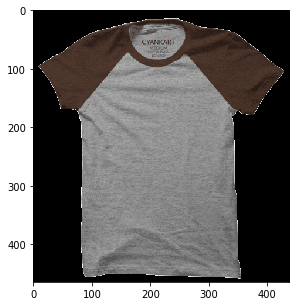

In [7]:
plt.imshow(img)

Note how many steps are required for the correct preprocessing, in this case, we are
* Convert the image from BGR to RGB
* Resizing to the expected input size
* Transforming to float32 data type
* Standardazing/normalizing the data (subtracting mean and dividing by standard deviation)

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (299, 299))
img = np.asarray(img, dtype='float32')
img = preprocess_input(img)

In [9]:
img = np.expand_dims(img, axis=0)

print(img.shape, img.dtype)

(1, 299, 299, 3) float32


### Testing

In [10]:
preds = inception.predict(img)
print(preds.shape)

(1, 1000)


In [11]:
decoded_preds = imagenet_utils.decode_predictions(preds)
print(decoded_preds)

[[('n03595614', 'jersey', 0.9903867), ('n03710637', 'maillot', 0.0011124205), ('n02037110', 'oystercatcher', 0.0007411424), ('n04370456', 'sweatshirt', 0.00027069685), ('n03133878', 'Crock_Pot', 0.00022514144)]]


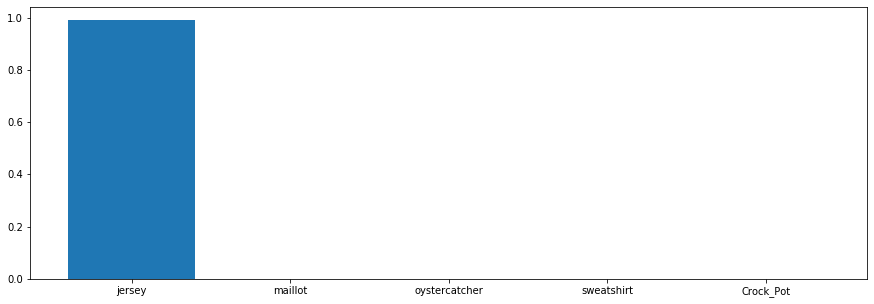

In [12]:
plot_predictions(decoded_preds)

### We can achieve the same results as above by using Keras' methods
Note that the load method loads the image using PIL

In [13]:
img_path = 'sample_images/tshirt.png'
img = image.load_img(img_path, color_mode='rgb', target_size=(299, 299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x13ADF49A288>


In [14]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
print(img.shape, img.dtype)

(1, 299, 299, 3) float32


In [15]:
preds = inception.predict(img)
decoded_preds = imagenet_utils.decode_predictions(preds)

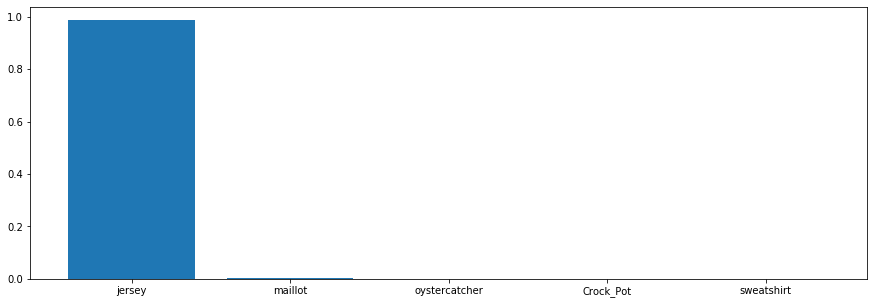

In [16]:
plot_predictions(decoded_preds)

### Try now other images and check your understanding!